# Métodos para la generación de datos sintéticos

**Máster universitario en Ciencia de Datos (MUCD) - CUNEF**    

**Autor: Antonio Tello Gómez**  
**Tutor: Diego J. Bodas Sagui**  
**Fecha:  29/03/2022**


![cunef](https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg)

# 2. Demostración datos sintéticos con Diamonds
**(2.0-diamonds-demo.ipynb)**

En este segundo notebook voy a utilizar otro dataset muy conocido y sencillo.

In [1]:

#Librerias
%load_ext autotime
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#Synthetic Data
#SDV
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN, TVAE
from sdv.evaluation import evaluate
import sdv
#Synthia
import xarray as xr
import synthia as syn
#import pyvinecopulib as pv
from table_evaluator import TableEvaluator



#ML 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from lightgbm import LGBMClassifier, plot_importance
 
import warnings
warnings.filterwarnings('ignore')


time: 3.06 s (started: 2022-06-08 12:54:22 +02:00)


In [2]:
df = sns.load_dataset("diamonds")

time: 53.5 ms (started: 2022-06-08 12:54:26 +02:00)


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


time: 16.4 ms (started: 2022-06-04 18:42:25 +02:00)


In [3]:
df[['cut','color','clarity']] = df[['cut','color','clarity']].astype(str)

time: 21.1 ms (started: 2022-06-08 12:54:32 +02:00)


In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=0)
print(f"Train size: {len(train)},", f"Test size: {len(test)}")

Train size: 43152, Test size: 10788
time: 18 ms (started: 2022-06-08 12:54:33 +02:00)


## Metadatos Tabla

In [5]:
field_types=  {
                "carat": {
                    "type" : "numerical",
                    "subtype" : "float"
                    },
                "cut": {
                    "type": "categorical"
                            },
                "color": {
                    "type": "categorical"
                            },
                "clarity": {
                    "type": "categorical"
                            },
                "depth":  {
                    "type" : "numerical",
                    "subtype" : "float"
                    },
                "table": {
                    "type":"numerical",
                    "subtype":"float"
                            },
                "price": {
                    "type":"numerical",
                    "subtype":"integer"
                            },
                "x": {
                    "type":"numerical",
                    "subtype":"float"
                            },
                "y": {
                    "type":"numerical",
                    "subtype":"float"
                            },
                "z": {
                    "type":"numerical",
                    "subtype":"float"
                            }
}

time: 1.23 ms (started: 2022-06-08 12:54:35 +02:00)


In [6]:
field_transformers = {
 'clarity': 'categorical_fuzzy'
}

time: 428 µs (started: 2022-06-08 12:54:36 +02:00)


## Generadores

In [7]:
gaussian_copula = GaussianCopula(field_types=field_types,field_transformers=field_transformers)

time: 524 µs (started: 2022-06-08 12:54:44 +02:00)


In [8]:
gaussian_copula.fit(train)

time: 26.2 s (started: 2022-06-08 12:54:45 +02:00)


In [10]:
np.random.seed(2022)
synthetic_data_gc = gaussian_copula.sample(len(df)*3)

time: 1.68 s (started: 2022-06-04 18:42:48 +02:00)


In [11]:
synthetic_data_gc.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.75,Good,G,VVS2,62.2,57.4,3335,5.63,5.74,3.51
1,0.62,Very Good,H,SI1,57.9,61.5,2526,5.66,5.66,3.33
2,0.95,Ideal,F,I1,61.5,54.7,3095,6.08,6.20,3.69
3,0.58,Premium,J,VS1,62.4,57.0,1555,5.19,5.21,3.09
4,0.35,Good,D,IF,62.6,56.3,1183,4.76,4.63,2.87
5,0.53,Ideal,F,SI2,62.2,55.6,2696,5.38,5.37,3.34


time: 13.5 ms (started: 2022-06-04 18:42:50 +02:00)


In [12]:
# Distribución marginal de cada columna 
gaussian_copula.get_distributions()

{'carat.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'cut.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'color.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'clarity.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'depth.value': 'copulas.univariate.log_laplace.LogLaplace',
 'table.value': 'copulas.univariate.gamma.GammaUnivariate',
 'price.value': 'copulas.univariate.gamma.GammaUnivariate',
 'x.value': 'copulas.univariate.gamma.GammaUnivariate',
 'y.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'z.value': 'copulas.univariate.gamma.GammaUnivariate'}

time: 3.49 ms (started: 2022-06-04 18:42:51 +02:00)


### Metadata

In [9]:
table_metadata = gaussian_copula.get_metadata().to_dict()
table_metadata['target'] = 'price'
table_metadata['name'] = 'diamonds'
metadata = {'tables': 
    {'diamonds': table_metadata}}
metadata = sdv.metadata.dataset.Metadata(metadata)

time: 1.86 ms (started: 2022-06-08 12:55:50 +02:00)


### CTGAN

In [15]:
ctgan = CTGAN(verbose=False, table_metadata=table_metadata)

time: 1.25 ms (started: 2022-06-04 18:42:52 +02:00)


In [16]:
ctgan.fit(train)

time: 9min 3s (started: 2022-06-04 18:42:53 +02:00)


In [17]:
#ctgan.save('../models/ctgan.pkl')

time: 293 µs (started: 2022-06-04 18:51:56 +02:00)


In [18]:
#ctgan = CTGAN.load('../models/ctgan.pkl')

time: 171 µs (started: 2022-06-04 18:51:56 +02:00)


In [19]:
ctgan.get_metadata()

Table(name=diamonds, field_names=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'])

time: 1.77 ms (started: 2022-06-04 18:51:56 +02:00)


In [20]:
np.random.seed(2022)
synthetic_data_ctgan = ctgan.sample(len(df)*3)

time: 2.12 s (started: 2022-06-04 18:51:56 +02:00)


In [21]:
synthetic_data_ctgan.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.53,Ideal,F,VS2,61.7,57.0,1124,5.22,5.20,3.17
1,0.73,Ideal,D,SI2,61.7,56.0,3634,5.63,6.13,3.31
2,0.45,Ideal,D,SI1,62.2,53.9,1015,4.62,4.79,2.99
3,0.72,Good,I,SI1,58.9,57.0,2093,5.23,5.83,3.10
4,1.00,Premium,F,VS2,62.1,58.0,6267,6.69,6.32,3.87


time: 8.23 ms (started: 2022-06-04 18:51:59 +02:00)


### CopulaGAN

In [25]:
copgan = CopulaGAN(verbose=False,field_types=field_types,field_transformers=field_transformers, cuda=True)

time: 1.14 ms (started: 2022-06-08 13:55:11 +02:00)


In [28]:
copgan.fit(train)

time: 9min 31s (started: 2022-06-08 13:55:38 +02:00)


In [ ]:
#ctgan.save('../models/copgan.pkl')

In [ ]:
#copgan = CTGAN.load('../models/copgan.pkl')

In [29]:
copgan.sample(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.58,Ideal,G,VS2,61.7,58.0,1834,5.23,5.45,3.36
1,2.27,Premium,J,SI2,50.0,58.0,15505,8.02,9.43,5.01
2,0.29,Very Good,E,VVS1,60.0,62.5,550,4.17,4.34,2.51
3,1.03,Ideal,E,SI2,62.4,56.0,3395,6.60,6.46,4.06
4,0.31,Ideal,H,SI1,61.6,54.0,3088,4.58,4.41,2.79
5,0.38,Very Good,G,VS2,60.3,61.0,518,4.79,4.86,2.95


time: 47.1 ms (started: 2022-06-08 14:05:10 +02:00)


In [32]:
np.random.seed(2022)
synthetic_data_copgan = copgan.sample(len(df)*3)

time: 2.83 s (started: 2022-06-08 14:05:28 +02:00)


In [33]:
# Distribución marginal de cada columna 
copgan.get_distributions()

{'carat.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'depth.value': 'copulas.univariate.log_laplace.LogLaplace',
 'table.value': 'copulas.univariate.gamma.GammaUnivariate',
 'price.value': 'copulas.univariate.gamma.GammaUnivariate',
 'x.value': 'copulas.univariate.gamma.GammaUnivariate',
 'y.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'z.value': 'copulas.univariate.gamma.GammaUnivariate'}

time: 2.89 ms (started: 2022-06-08 14:05:31 +02:00)


## TVAE

In [12]:
tvae = TVAE(table_metadata=table_metadata, cuda=True)

time: 913 µs (started: 2022-06-08 12:59:45 +02:00)


In [13]:
tvae.fit(train)

time: 7min 27s (started: 2022-06-08 12:59:46 +02:00)


In [15]:
tvae.sample(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.70,Ideal,E,VS1,62.1,59.0,3544,5.96,5.67,3.53
1,0.78,Good,E,SI1,59.4,59.0,951,5.59,5.23,3.20
2,1.19,Very Good,E,SI1,63.9,56.0,4596,6.61,6.34,4.21
3,0.39,Very Good,E,VVS1,66.0,57.0,826,4.63,4.73,2.93
4,0.34,Premium,E,VVS1,60.7,58.0,695,4.37,4.57,2.71
5,0.53,Premium,E,VS2,59.5,58.0,1542,5.24,5.23,3.13


time: 150 ms (started: 2022-06-08 13:37:39 +02:00)


In [ ]:
tvae.save('../models/tvae.pkl')

time: 306 µs (started: 2022-06-04 19:03:16 +02:00)


In [28]:
#tvae = CTGAN.load('../models/tvae.pkl')

time: 286 µs (started: 2022-06-04 19:03:17 +02:00)


In [16]:
np.random.seed(2022)
synthetic_data_tvae = tvae.sample(len(df)*3)

time: 5.96 s (started: 2022-06-08 13:37:42 +02:00)


### fPCA

#### Reversible Data Transform (RDT)

In [30]:
from rdt import HyperTransformer
ht = HyperTransformer(field_types)

time: 492 µs (started: 2022-06-04 19:03:21 +02:00)


In [31]:
ht.fit(df)

time: 108 ms (started: 2022-06-04 19:03:24 +02:00)


In [32]:
transformed = ht.transform(df)
transformed

,carat.value,cut.value,color.value,clarity.value,depth.value,table.value,price.value,x.value,y.value,z.value
0,0.23,0.242078,0.256371,0.556380,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0.534049,0.315305,0.147663,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0.924496,0.276257,0.667103,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0.539098,0.897736,0.341233,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0.922484,0.978126,0.575320,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0.220532,0.771063,0.144997,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,0.929639,0.779817,0.080700,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,0.783418,0.776228,0.095830,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,0.507376,0.631331,0.533700,61.0,58.0,2757,6.15,6.12,3.74


time: 88.7 ms (started: 2022-06-04 19:03:27 +02:00)


In [33]:
fpca = syn.FPCADataGenerator()
fpca.fit(transformed, n_fpca_components=5)

time: 10.7 ms (started: 2022-06-04 19:03:30 +02:00)


In [34]:
np.random.seed(2022)
synthetic_data_fpca = fpca.generate(n_samples=len(df)*3)
synthetic_data_fpca = pd.DataFrame(synthetic_data_fpca, columns=['carat.value','cut.value','color.value','clarity.value','depth.value','table.value','price.value','x.value','y.value','z.value'])
synthetic_data_fpca = ht.reverse_transform(synthetic_data_fpca)
synthetic_data_fpca.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
161815,1.494599,Premium,H,VS2,61.877880,55.395691,8922,7.290148,7.361606,4.533297
161816,0.841006,Premium,H,VS2,62.203313,55.307368,2701,6.144484,6.210795,3.828386
161817,0.756185,Very Good,F,SI2,63.136462,60.891516,4892,5.525493,5.428059,3.460734
161818,1.011952,Very Good,F,SI2,62.796705,58.934266,6087,6.154389,6.121061,3.850267
161819,0.744347,Premium,F,SI2,62.743964,57.467197,4521,5.187579,5.152931,3.269289


time: 9 s (started: 2022-06-04 19:03:34 +02:00)


### Gaussian Copula (Synthia) 

In [35]:
parameterizer = syn.QuantileParameterizer(n_quantiles=100)
gcs = syn.CopulaDataGenerator()
gcs.fit(transformed, copula=syn.GaussianCopula(), parameterize_by=parameterizer)

time: 91.3 ms (started: 2022-06-04 19:03:44 +02:00)


In [36]:
np.random.seed(2022)
synthetic_data_gcs = gcs.generate(n_samples=len(df)*3)
synthetic_data_gcs = pd.DataFrame(synthetic_data_gcs, columns=['carat.value','cut.value','color.value','clarity.value','depth.value','table.value','price.value','x.value','y.value','z.value'])
synthetic_data_gcs = ht.reverse_transform(synthetic_data_gcs)
synthetic_data_gcs.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
161815,0.502689,Premium,D,SI1,62.400000,56.0,1069,5.097937,5.117640,3.198250
161816,0.700000,Ideal,D,SI1,62.100000,56.0,1329,5.715172,5.607575,3.530465
161817,0.499479,Ideal,H,VVS1,56.403475,59.0,1907,5.204581,5.134433,2.921703
161818,0.517593,Premium,H,IF,62.200000,58.0,1607,4.990437,5.111676,3.020662
161819,0.310000,Ideal,G,VS1,63.068087,55.0,522,4.321975,4.355474,2.728054


time: 1.45 s (started: 2022-06-04 19:03:44 +02:00)


### Vine Copula


In [37]:
parameterizer = syn.QuantileParameterizer(n_quantiles=100)
vc = syn.CopulaDataGenerator()
vc.fit(transformed, copula=syn.VineCopula(), parameterize_by=parameterizer)

time: 15min 13s (started: 2022-06-04 19:03:45 +02:00)


In [38]:
np.random.seed(2022)
synthetic_data_vc = vc.generate(n_samples=len(df)*3)
synthetic_data_vc = pd.DataFrame(synthetic_data_vc, columns=['carat.value','cut.value','color.value','clarity.value','depth.value','table.value','price.value','x.value','y.value','z.value'])
synthetic_data_vc = ht.reverse_transform(synthetic_data_vc)
synthetic_data_vc.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
161815,0.513986,Ideal,E,VVS2,61.484652,56.000000,1840,5.092831,5.180836,3.177430
161816,1.010000,Fair,I,SI1,65.014537,59.000000,1704,6.327042,6.181263,4.013915
161817,1.204012,Very Good,D,VS1,60.999274,57.000000,9709,7.014886,7.170450,4.232917
161818,0.420000,Ideal,I,VVS2,60.900000,60.400635,1329,4.853093,4.981585,2.963148
161819,1.587585,Ideal,H,SI2,62.148270,58.000000,7584,7.491367,7.454489,4.645429


time: 3min 53s (started: 2022-06-04 19:18:59 +02:00)


## Evaluación

In [39]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


time: 45.3 ms (started: 2022-06-04 19:22:53 +02:00)


In [40]:
synthetic_data_ctgan.describe()

,carat,depth,table,price,x,y,z
count,161820.000000,161820.000000,161820.000000,161820.000000,161820.000000,161820.000000,161820.000000
mean,0.824366,61.873551,57.519062,3910.159789,5.711677,5.775243,3.561457
std,0.510008,1.398424,2.245166,4085.217954,1.153233,1.147476,0.725492
min,0.200000,54.700000,53.500000,327.000000,3.470000,2.540000,0.780000
25%,0.400000,61.200000,56.000000,851.000000,4.680000,4.750000,2.930000
50%,0.710000,62.000000,57.000000,2550.000000,5.680000,5.750000,3.540000
75%,1.080000,62.600000,59.000000,4848.000000,6.600000,6.640000,4.090000
max,3.300000,71.800000,66.400000,18823.000000,9.080000,11.000000,7.670000


time: 93.2 ms (started: 2022-06-04 19:22:53 +02:00)


### Evaluation Metrics

In [41]:
synth_data = [synthetic_data_gc,synthetic_data_ctgan,synthetic_data_tvae, synthetic_data_fpca, synthetic_data_gcs, synthetic_data_vc]

time: 630 µs (started: 2022-06-04 19:22:53 +02:00)


In [42]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

time: 589 µs (started: 2022-06-04 19:22:53 +02:00)


In [43]:
for dataset in synth_data:
    print(f"Overall Score {get_df_name(dataset)}:",evaluate(dataset, df, metadata, table_name='diamonds'))

: 

: 

Desafortunadamente calcular el score de todos los generadores es demasiado cosotoso desde el punto de vista computacional es por ello que primero evaluamos de forma gráfica los generadores y a continuación generamos las métricas del que tenga un mejor desempeño aparente

### Table Evaluator

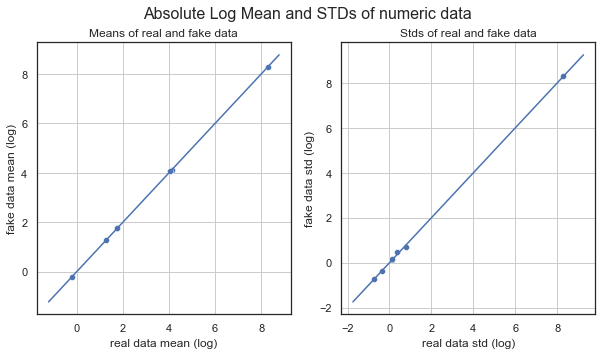

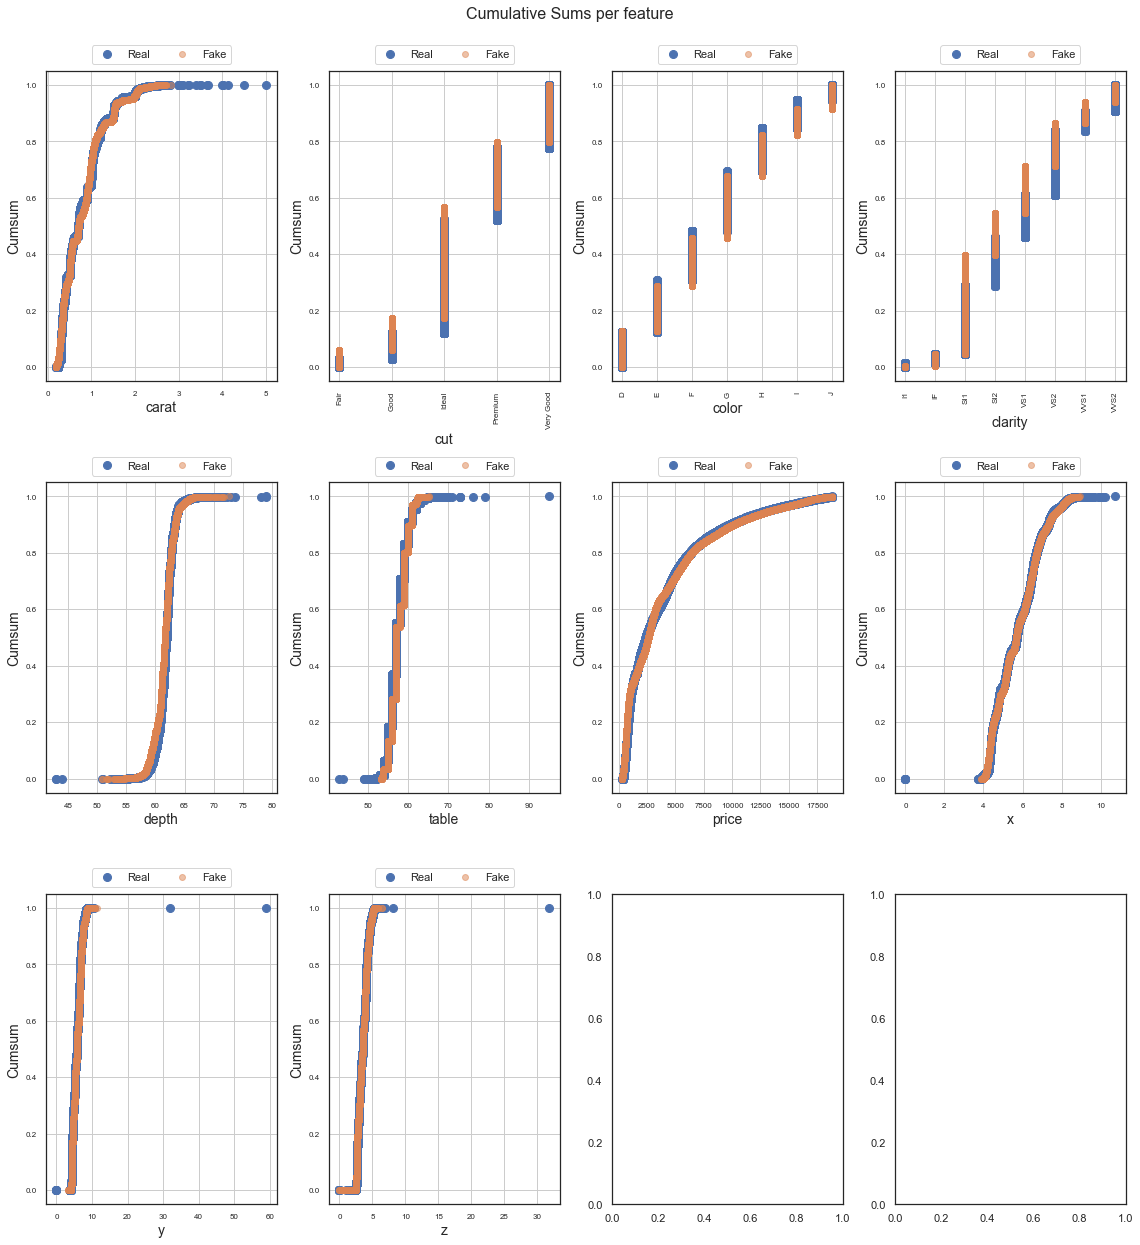

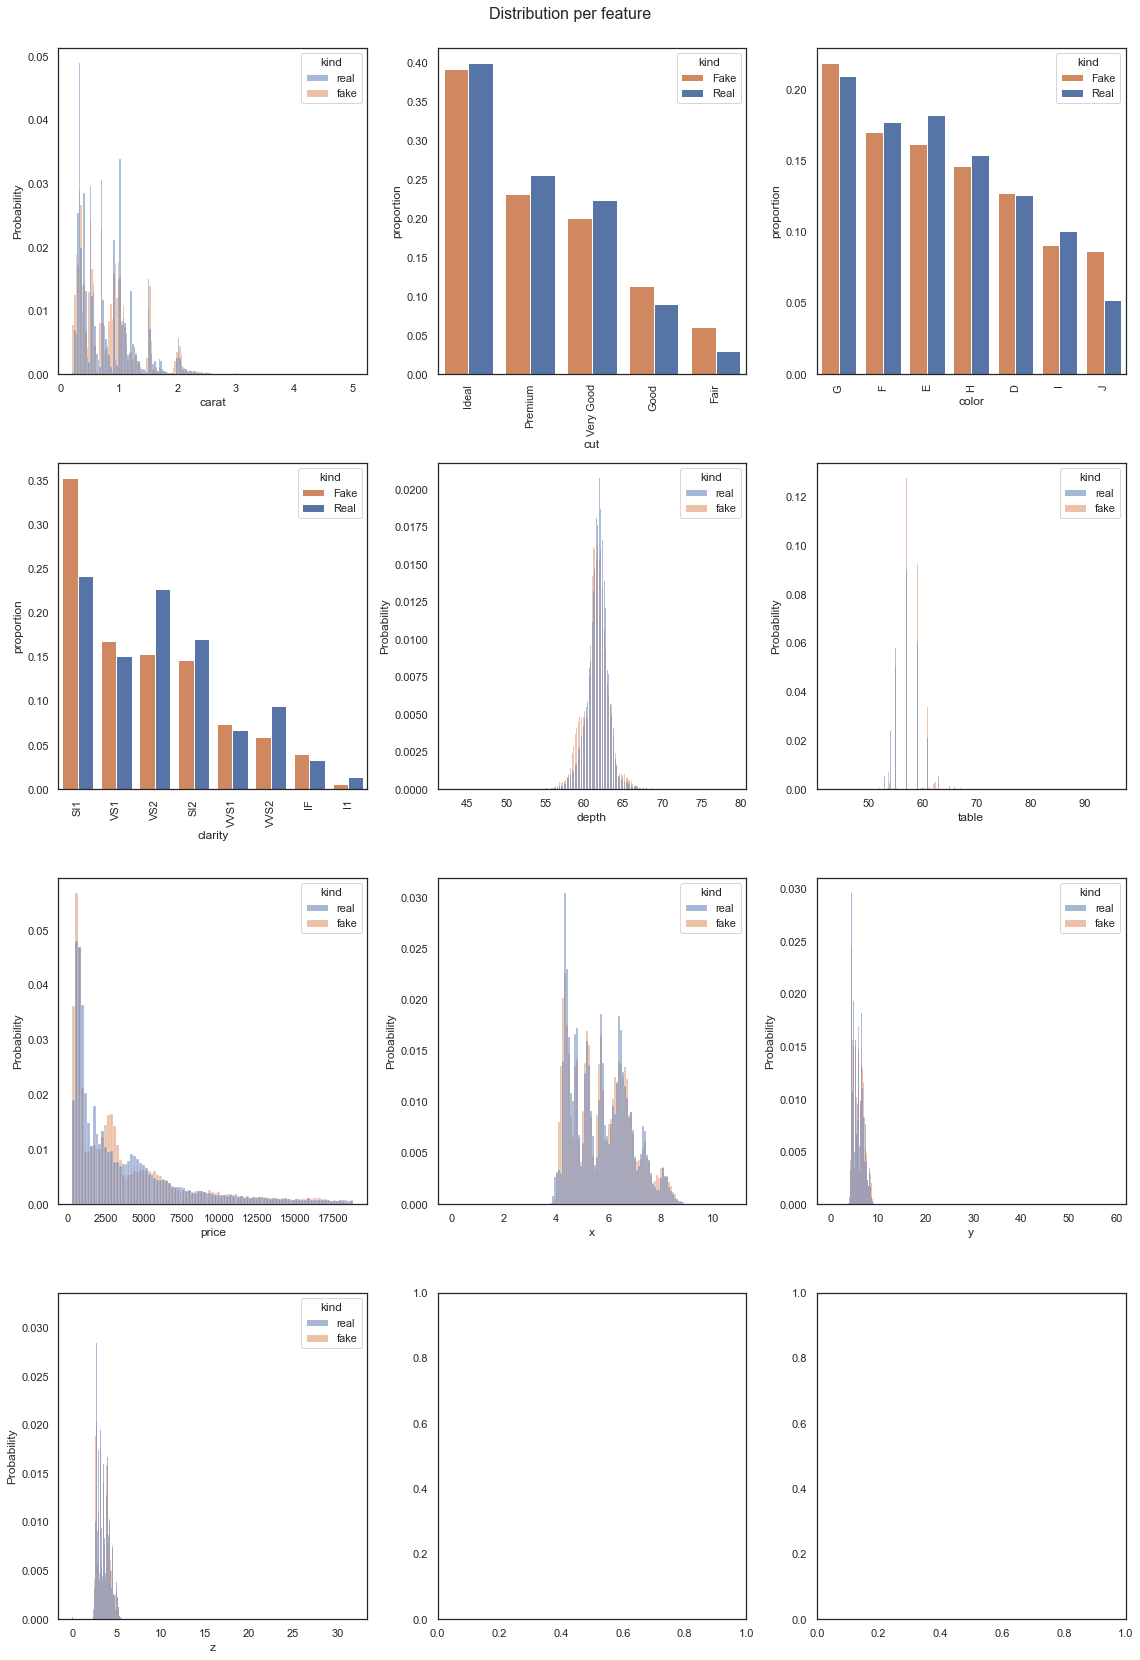

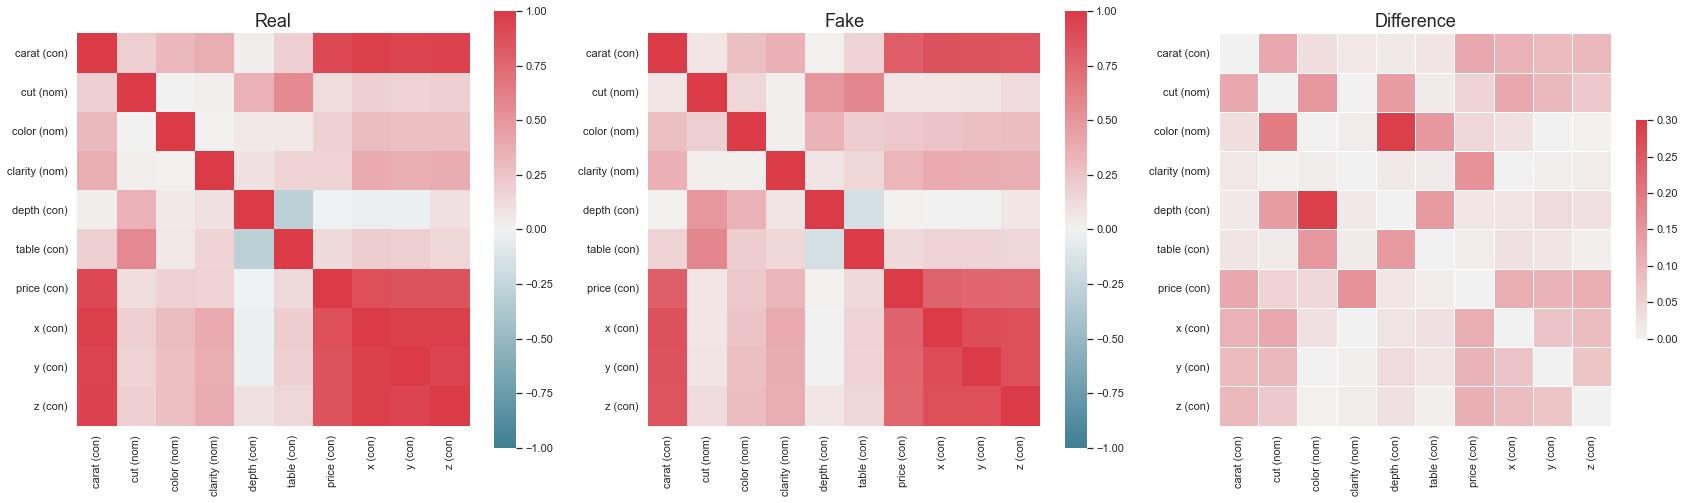

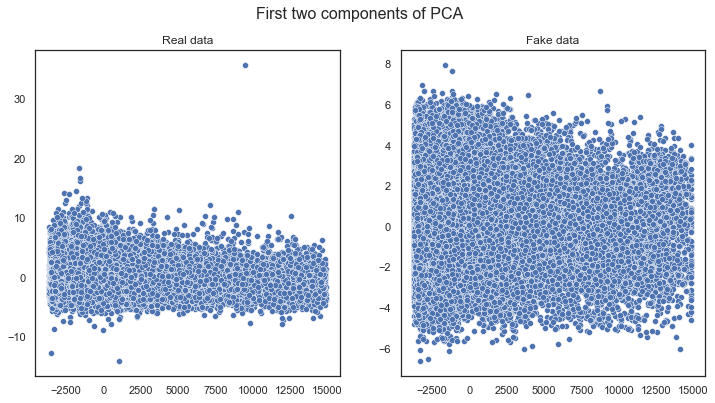

time: 23.6 s


In [ ]:
#CTGAN
table_evaluator = TableEvaluator(df, synthetic_data_ctgan)
table_evaluator.visual_evaluation()

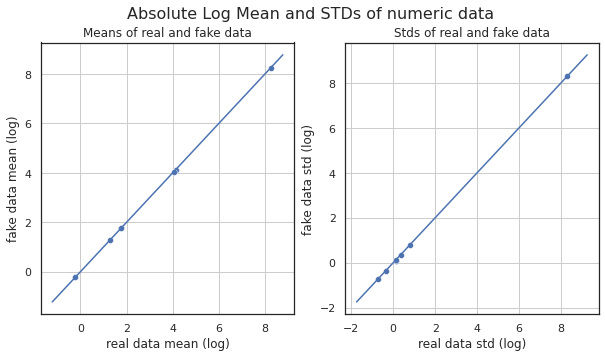

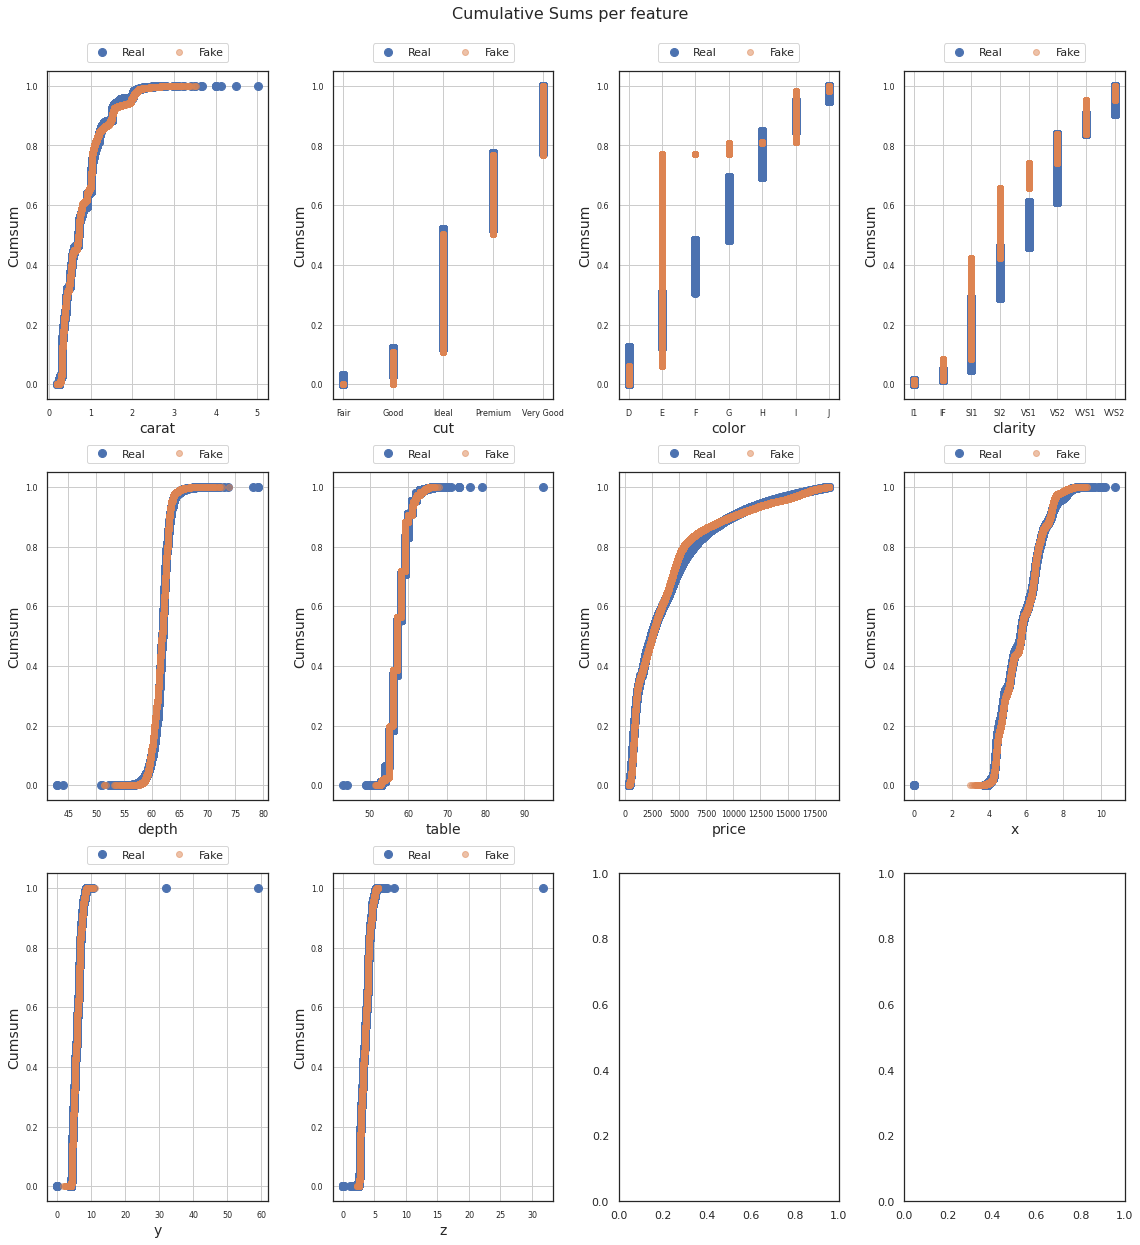

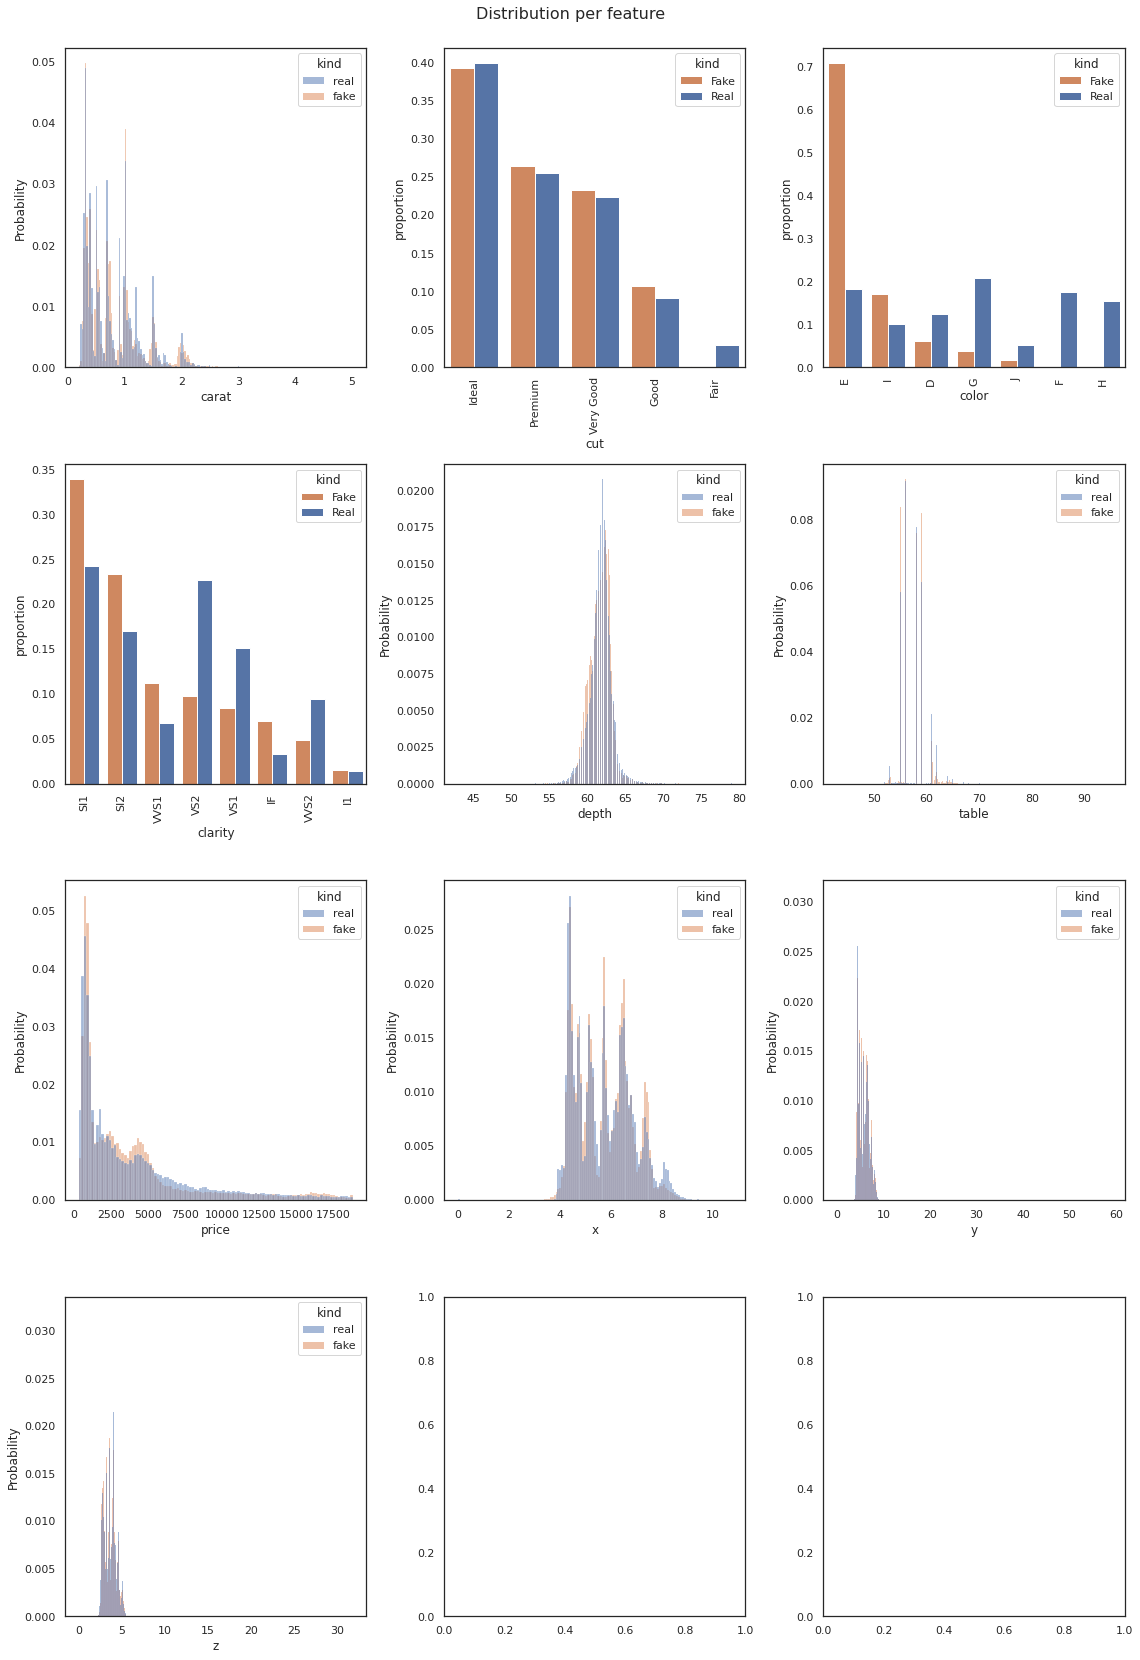

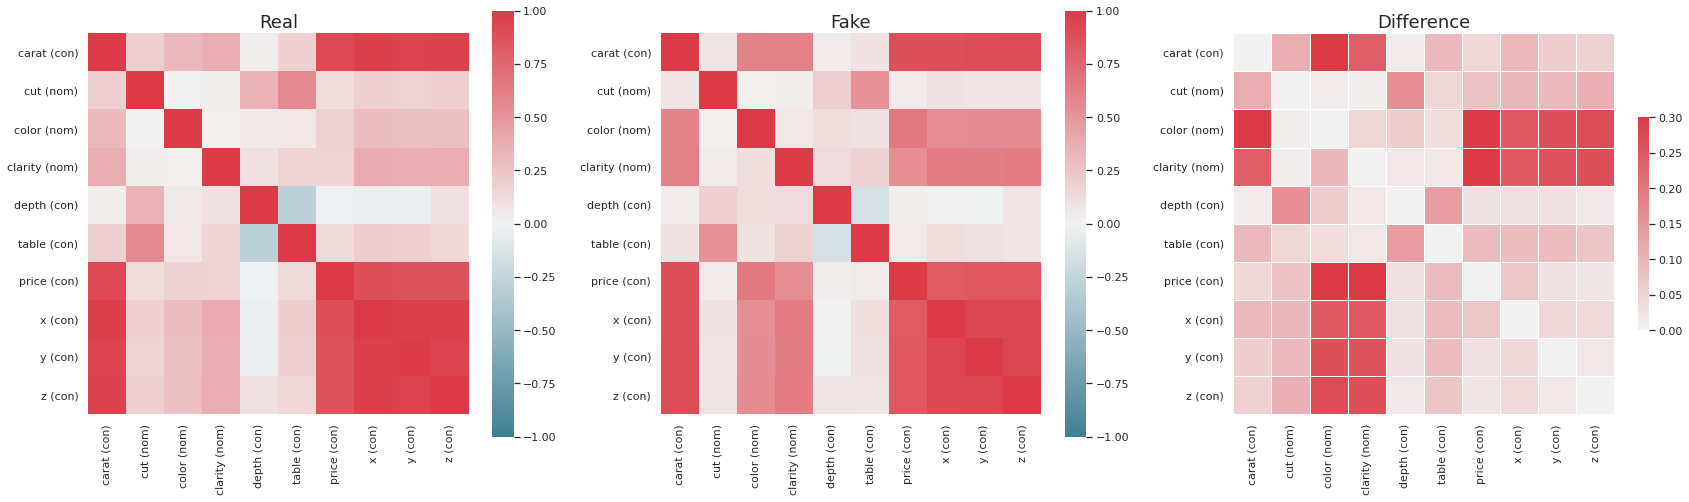

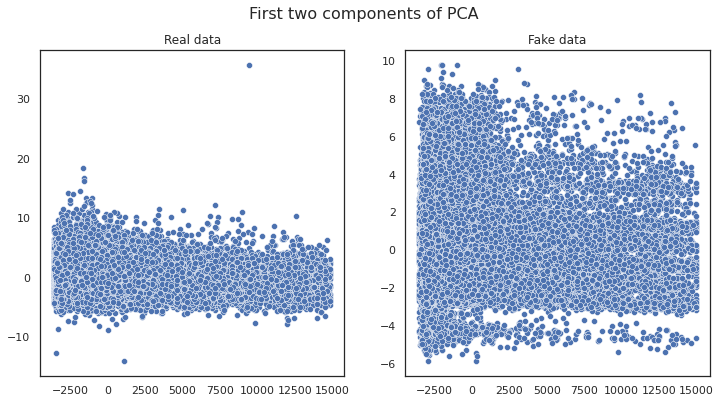

time: 19.6 s (started: 2022-06-08 13:53:31 +02:00)


In [24]:
#TVAE
table_evaluator = TableEvaluator(df, synthetic_data_tvae)
table_evaluator.visual_evaluation()

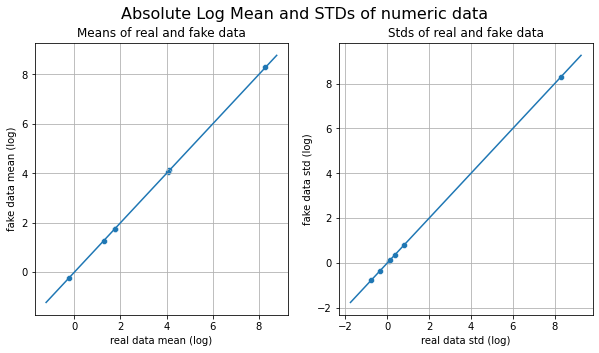

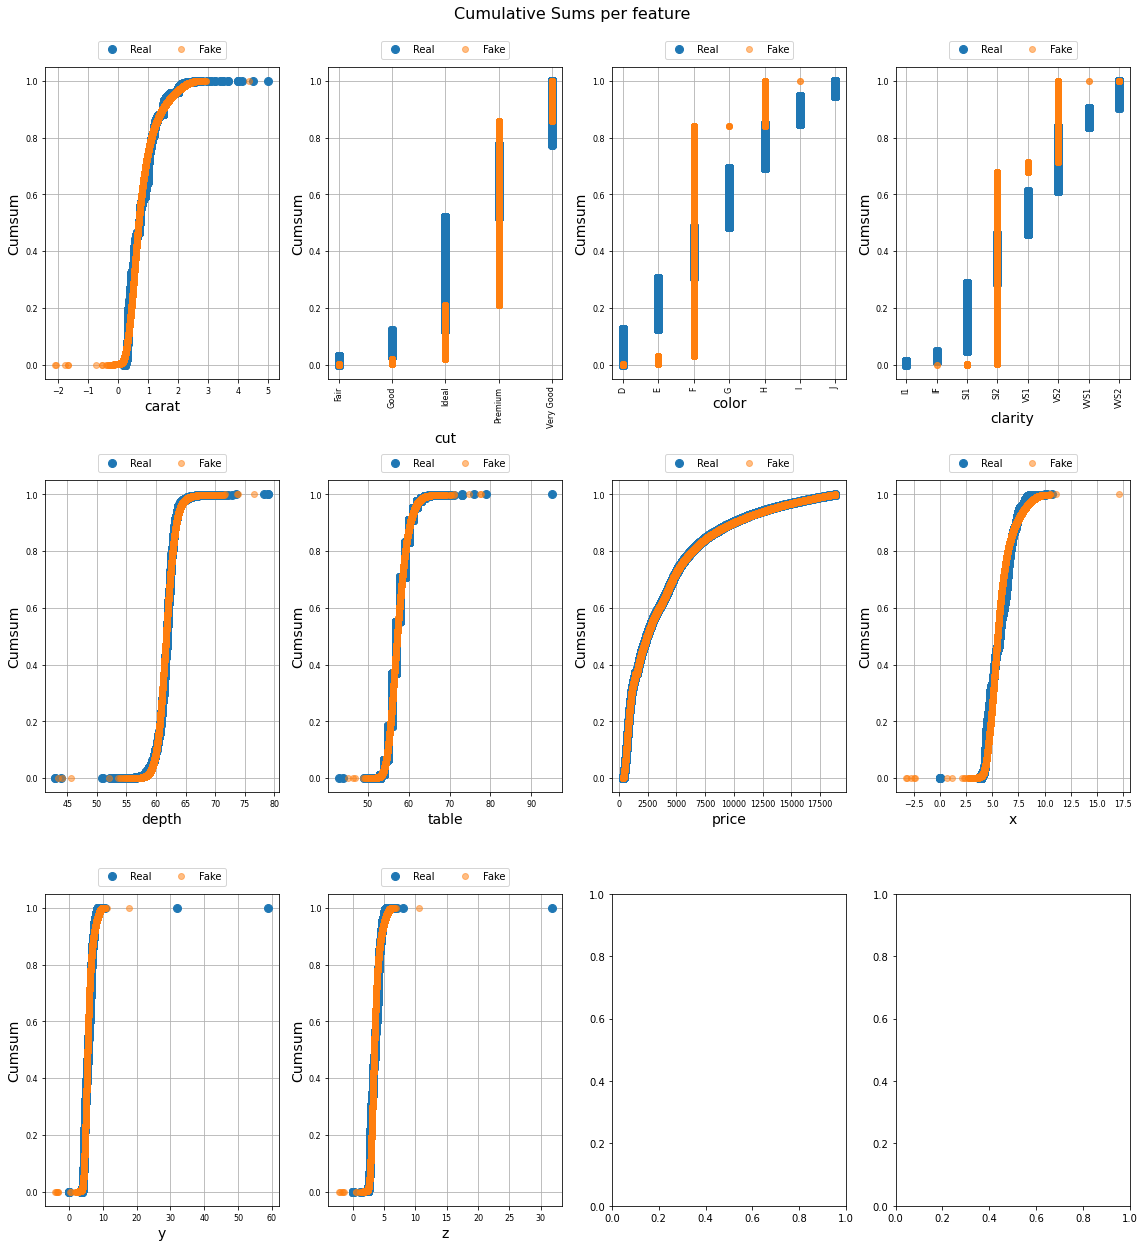

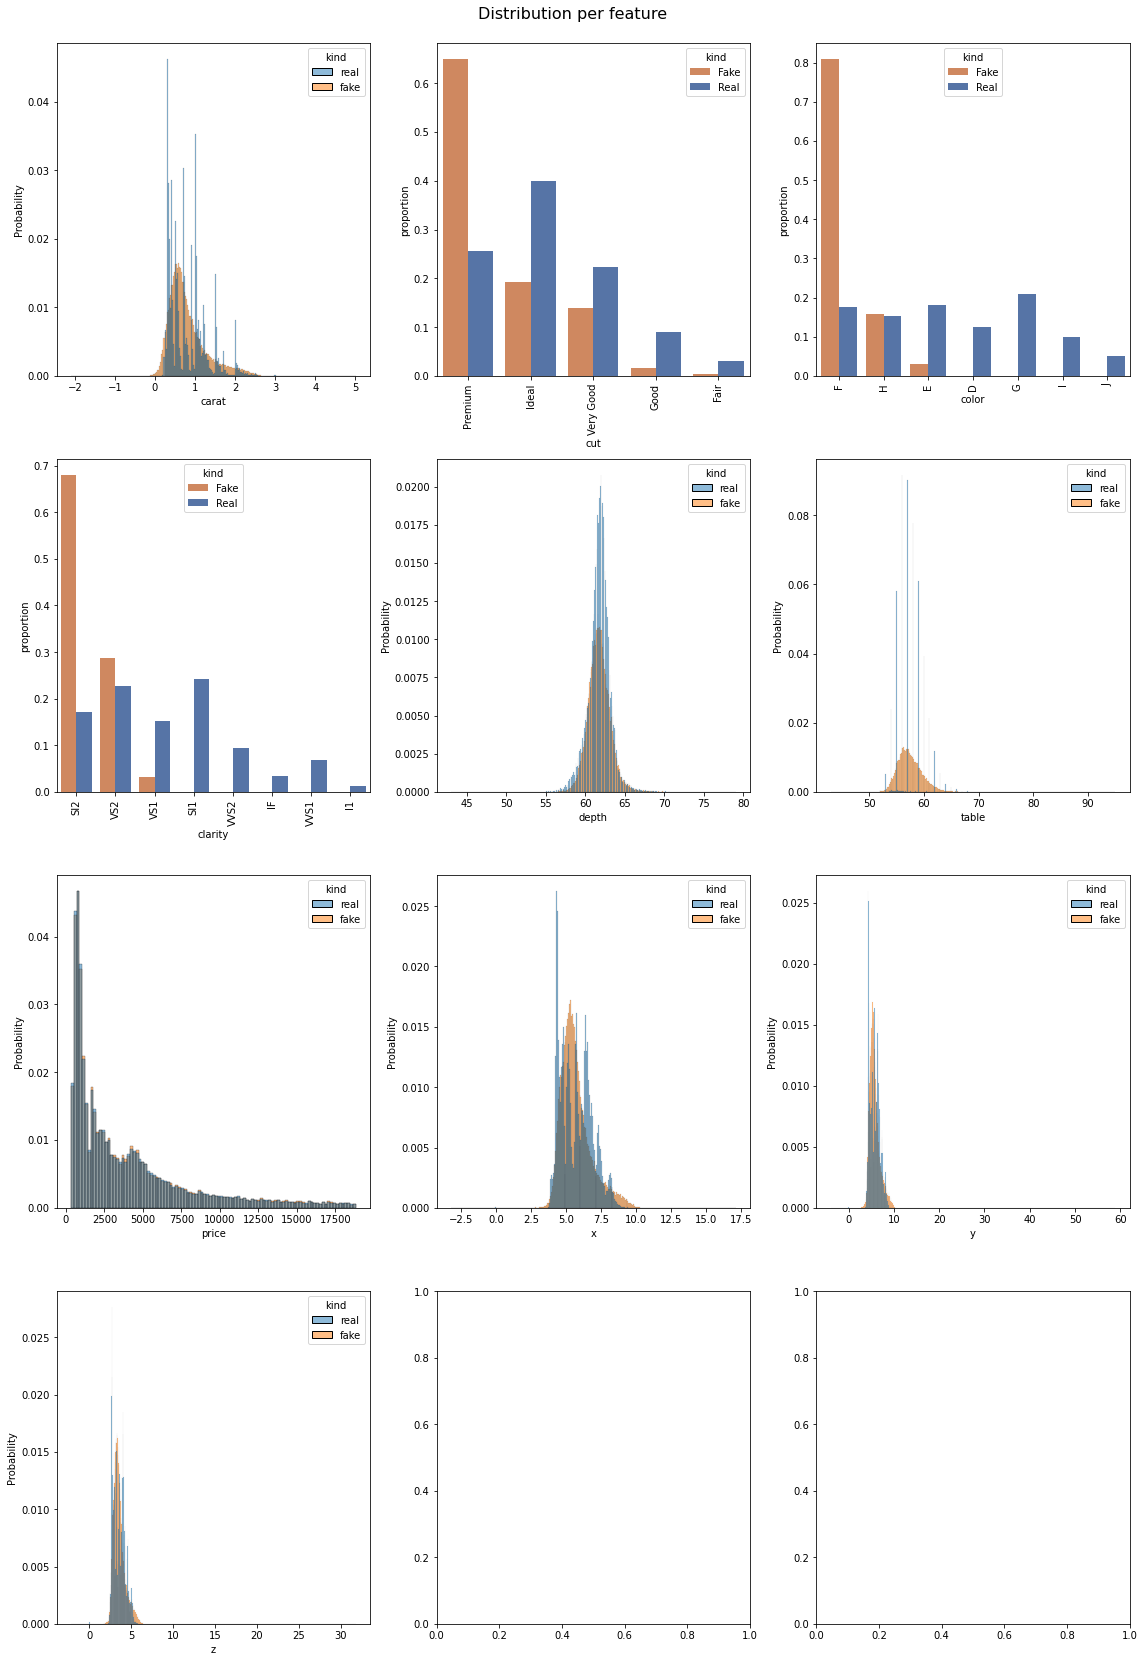

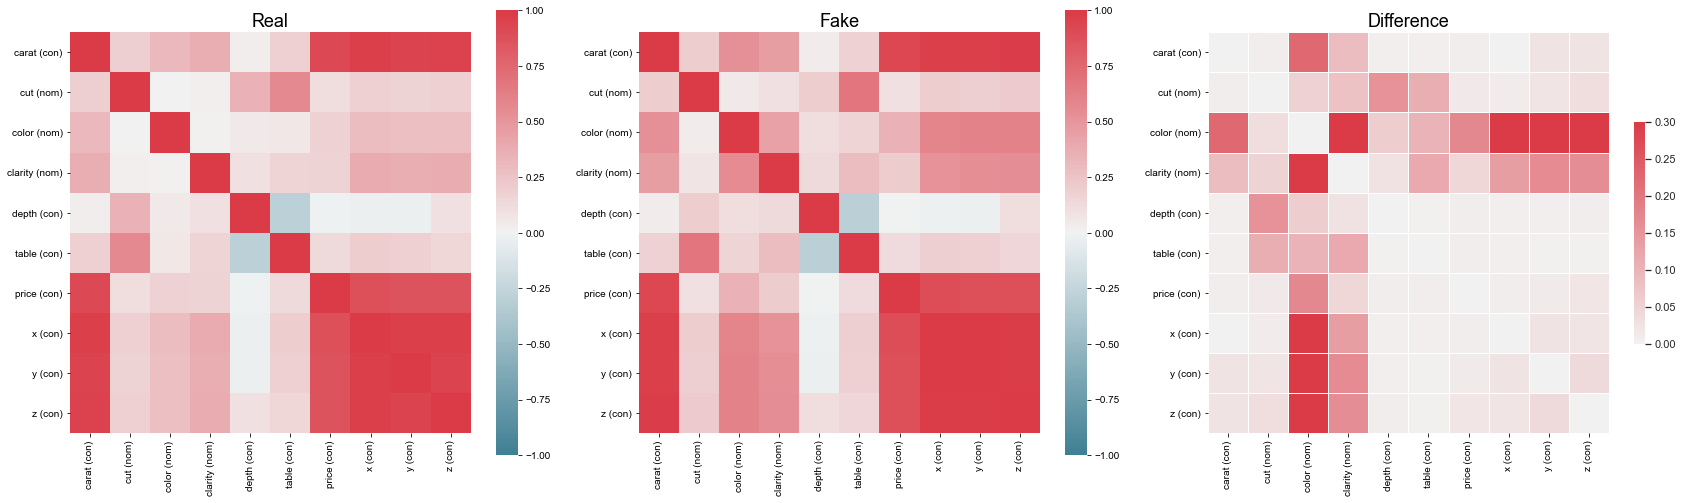

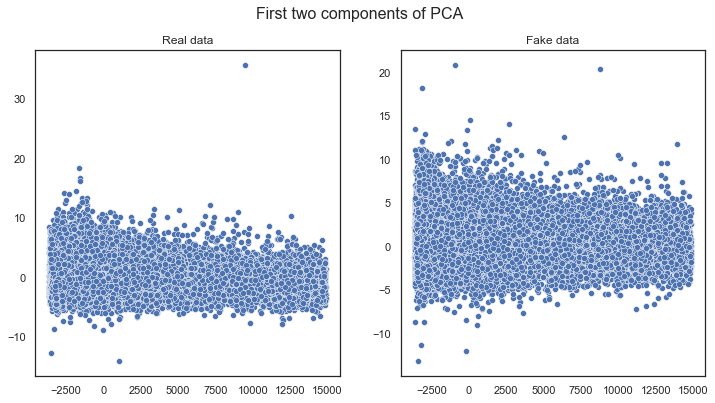

time: 24.1 s


In [ ]:
#fPCA
table_evaluator = TableEvaluator(df, synthetic_data_fpca)
table_evaluator.visual_evaluation()

## Best

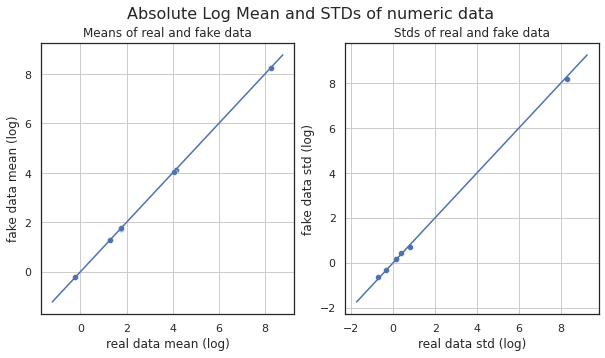

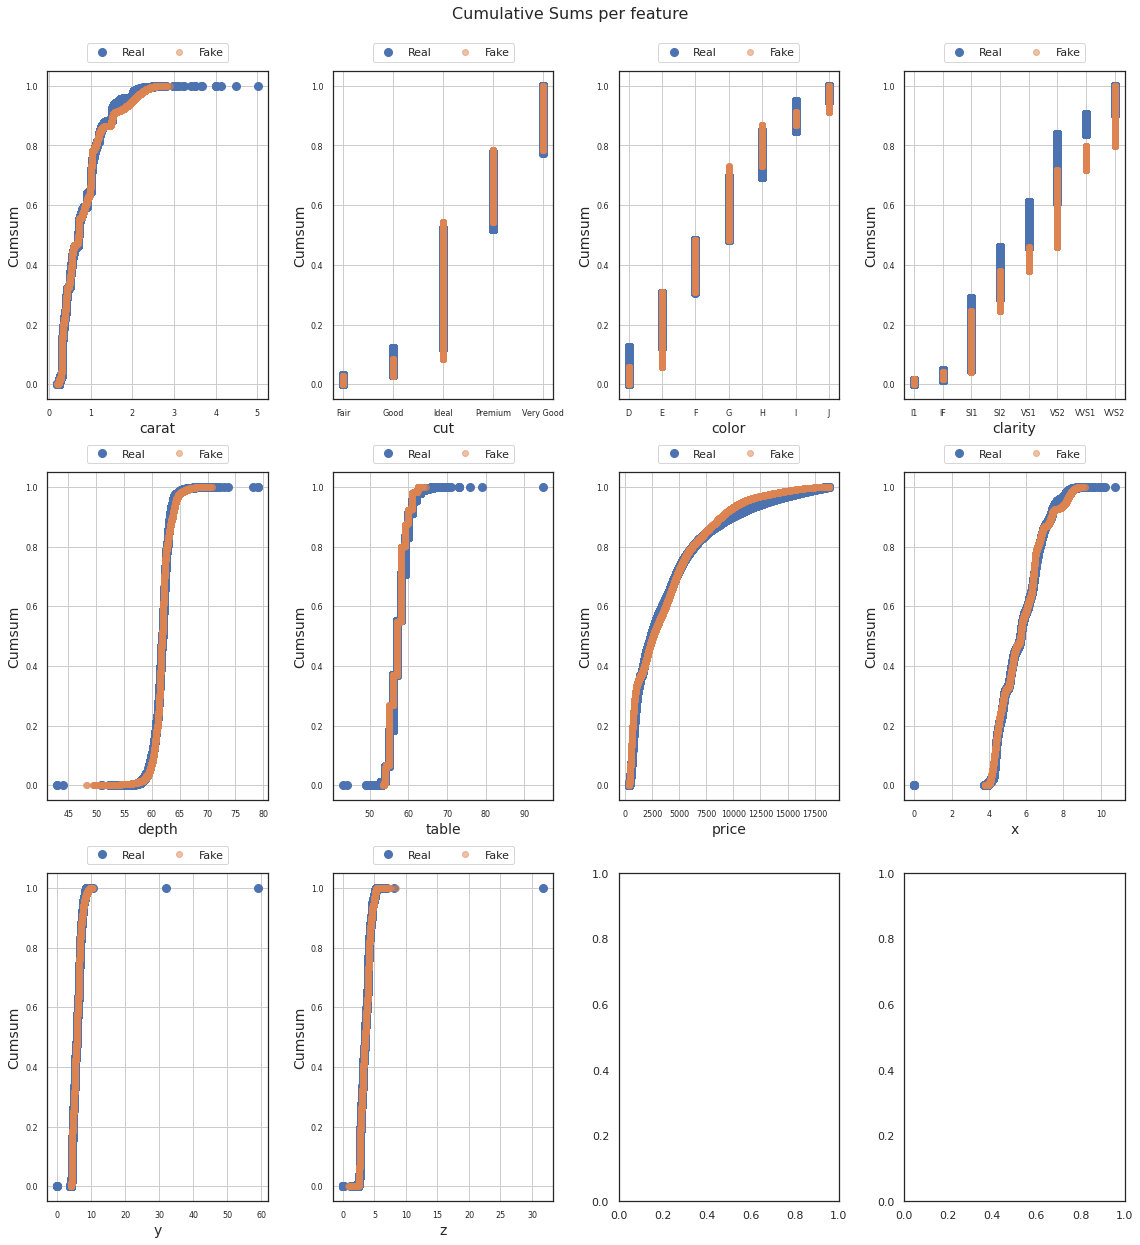

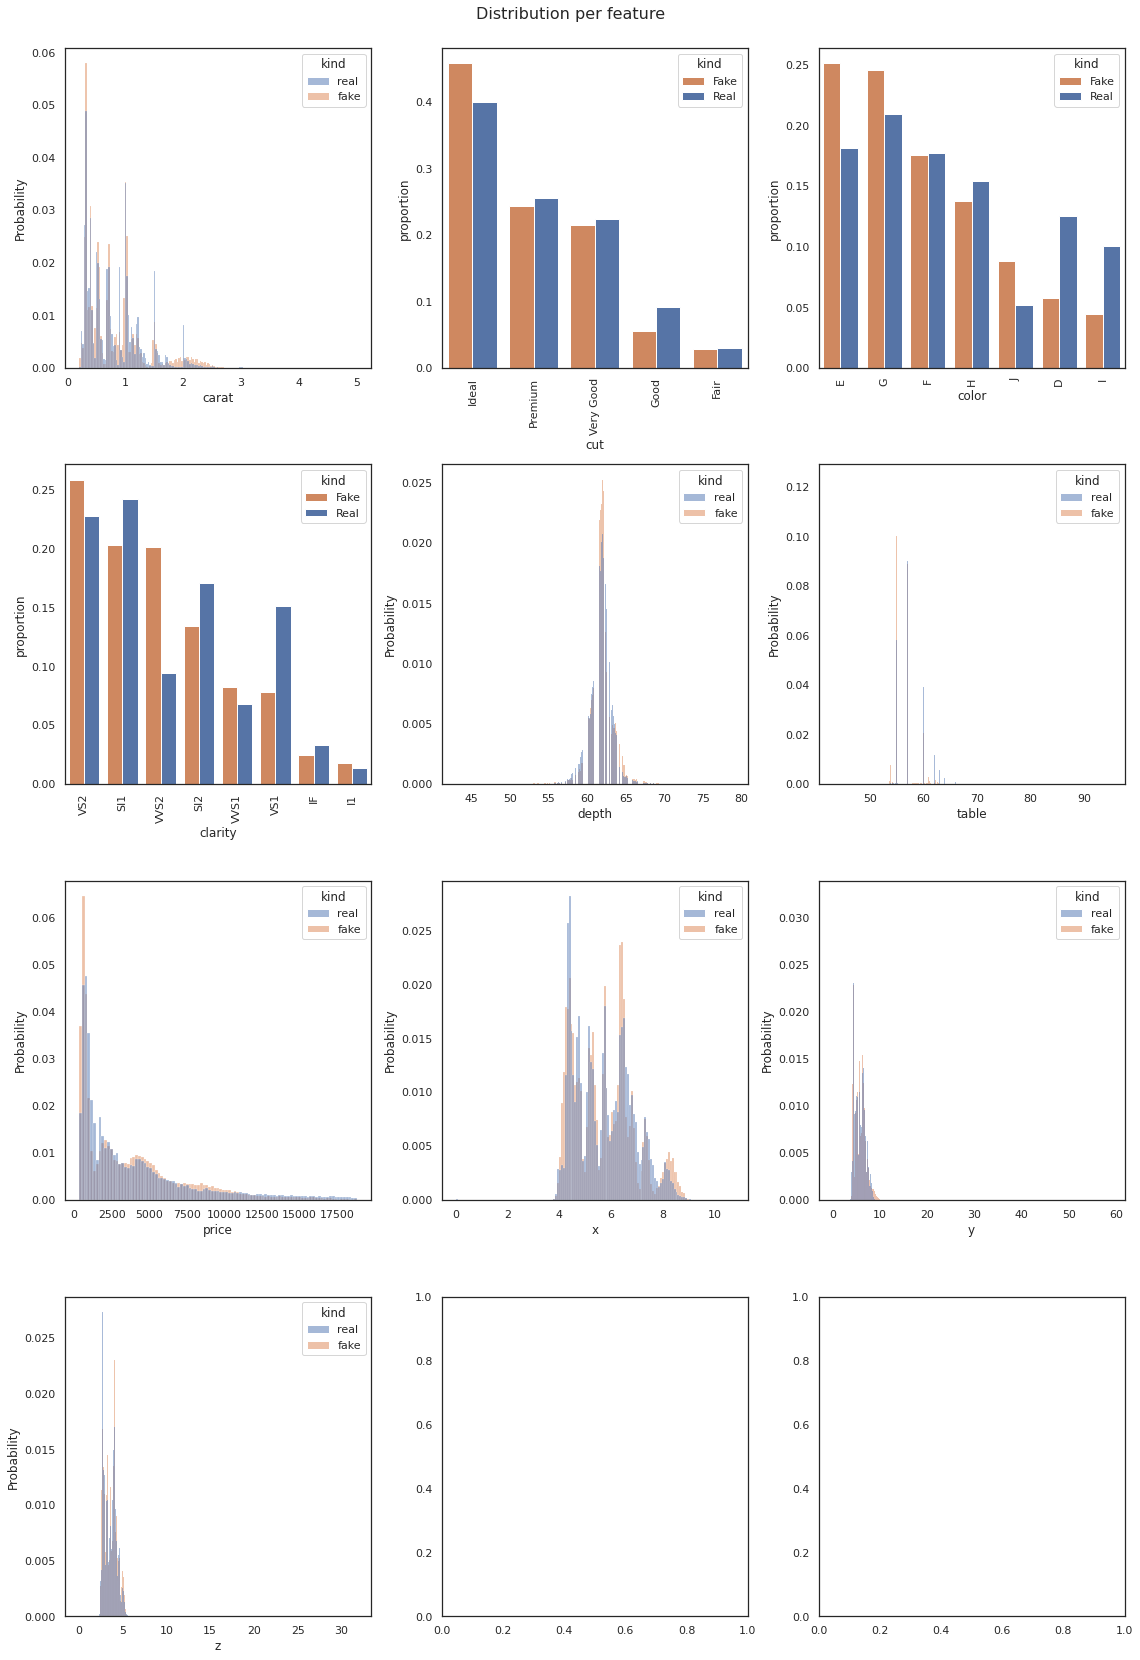

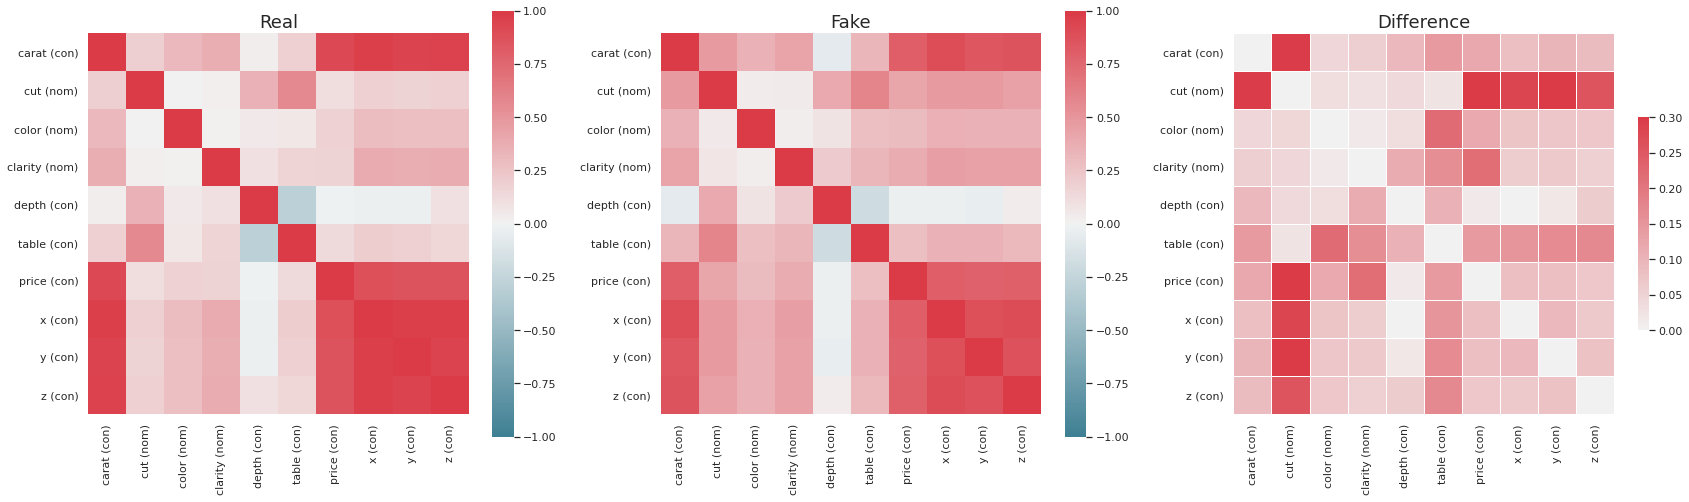

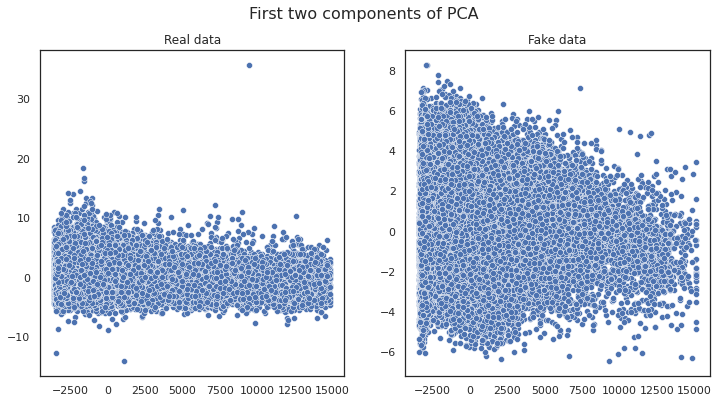

time: 21.4 s (started: 2022-06-08 14:05:38 +02:00)


In [34]:
#CopGan
table_evaluator = TableEvaluator(df, synthetic_data_copgan)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='price')

In [ ]:
ev = evaluate(synthetic_data_copgan, df,metadata,aggregate=False,table_name='diamonds')
print(ev)